<a href="https://colab.research.google.com/github/cvillanue/mathematics_deeplearning/blob/main/FeedForward_DLVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# the architecture
input_size = 3
hidden_size = 2
output_size = 1

# Creating random weights and biases
weights_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.random.randn(hidden_size)
weights_output = np.random.randn(hidden_size, output_size)
bias_output = np.random.randn(output_size)

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(input_data):
    hidden_output = sigmoid(np.dot(input_data, weights_hidden) + bias_hidden)
    output = sigmoid(np.dot(hidden_output, weights_output) + bias_output)
    
    return hidden_output, output
    
input_data = np.random.randn(5, input_size)

hidden_output, output = forward_propagation(input_data)

In [3]:
import networkx as nx

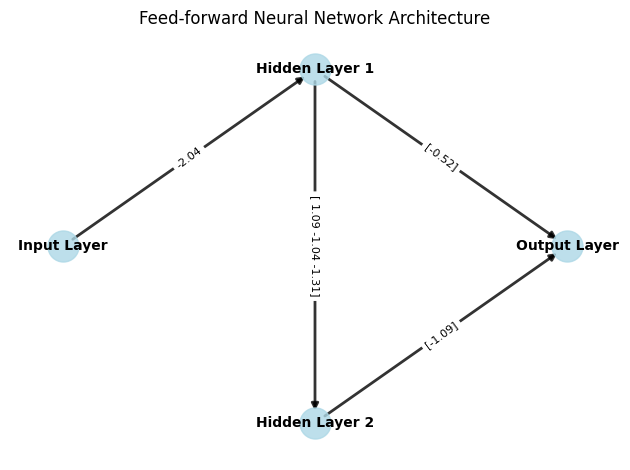

In [7]:
# Create a graph object
G = nx.DiGraph()

# Adding nodes & edges
G.add_nodes_from(['Input Layer'] + ['Hidden Layer ' + str(i) for i in range(1, hidden_size+1)] + ['Output Layer'])

for i in range(input_size):
    G.add_edge('Input Layer', 'Hidden Layer 1', weight=weights_hidden[i][0])
for i in range(hidden_size):
    if i < hidden_size-1:
        G.add_edge('Hidden Layer ' + str(i+1), 'Hidden Layer ' + str(i+2), weight=weights_hidden[:, i+1])
    G.add_edge('Hidden Layer ' + str(i+1), 'Output Layer', weight=weights_output[i])

# Assign subset_key attribute to nodes
for node in G.nodes:
    if node == 'Input Layer':
        G.nodes[node]['subset'] = 0  
    elif node == 'Output Layer':
        G.nodes[node]['subset'] = 2  
    else:
        G.nodes[node]['subset'] = 1  

# Drawing the network /position
pos = nx.multipartite_layout(G, subset_key='subset')


nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, alpha=0.8)

edge_labels = {(u, v): np.round(d['weight'], 2) for u, v, d in G.edges(data=True)}  # Use np.round() for rounding
nx.draw_networkx_edges(G, pos, width=2, alpha=0.8, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, node_labels, font_size=10, font_weight='bold')

plt.axis('off')

# Plotting
plt.title('Feed-forward Neural Network Architecture')
plt.tight_layout()
plt.show()
